In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data Collection

## Debarred Suppliers

In [2]:
## Suppliers dataset

WBSuppliers = pd.read_excel("WB_sanctioned_suppliers.xlsx", header=1, encoding='utf8')

In [3]:
WBSuppliers.columns

Index(['Firm Name', 'Additional Firm Info', 'Address', 'Country',
       'Ineligibility Period', 'Unnamed: 5', 'Grounds'],
      dtype='object')

In [4]:
# Rename columns 
WBSuppliers.rename(columns={'Ineligibility Period': 'Ineligibility Period: From Date', 'Unnamed: 5': 'To Date'}, inplace=True)
WBSuppliers.columns

Index(['Firm Name', 'Additional Firm Info', 'Address', 'Country',
       'Ineligibility Period: From Date', 'To Date', 'Grounds'],
      dtype='object')

In [5]:
# Remove 1st row
WBSuppliers = WBSuppliers.iloc[1:]

In [6]:
# Has 1154 unique suppliers 
WBSuppliers['Firm Name'].nunique()

1154

## World Bank

In [7]:
# Open and read World Bank Data 
WBContracts = pd.read_csv("WB_contracts_2000-2021.csv")

In [8]:
WBContracts.head(3)

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Procurement Type,Procurement Category,Procurement Method,...,Major Sector,WB Contract Number,Contract Description,Contract Signing Date,Supplier,Supplier Country,Supplier Country Code,Supplier State,Total Contract Amount (USD),Borrower Contract Reference Number
0,09/09/2020 12:00:00 AM,2000,AFE,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,Financial Sector,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,11/20/2000 12:00:00 AM,KPMG INTERNATIONAL,United Kingdom,GB,Not assigned,800000.00,KPMG - 11/20/2000
1,09/09/2020 12:00:00 AM,2000,AFE,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,Public Admin,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,11/20/2000 12:00:00 AM,KPMG INTERNATIONAL,United Kingdom,GB,Not assigned,800000.00,KPMG - 11/20/2000
2,09/09/2020 12:00:00 AM,2000,AFE,Madagascar,MG,P052186,MG-Microfinance,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,Financial Sector,1116602,APPUI AU DEVELOPPEMENT DU RESEAU OTIV (TOAMASINA),09/17/1999 12:00:00 AM,DEVELOPMENT INTERNA.DESJARDINS,Canada,CA,Not assigned,1964921.66,1/01/10/99/AGEPMF/DID


In [9]:
# Dataset from 2000 to 2021 (fiscal year)

WBContracts['Fiscal Year'].nunique()

22

In [10]:
WBContracts['WB Contract Number'].nunique()

172424

In [11]:
# Make sure there are no duplicates and I only have unique contract numbers
WBContracts = WBContracts.drop_duplicates('WB Contract Number', keep='first')

In [12]:
WBContracts.columns

Index(['As of Date', 'Fiscal Year', 'Region', 'Borrower Country',
       'Borrower Country Code', 'Project ID', 'Project Name',
       'Procurement Type', 'Procurement Category', 'Procurement Method',
       'Product line', 'Major Sector', 'WB Contract Number',
       'Contract Description', 'Contract Signing Date', 'Supplier',
       'Supplier Country', 'Supplier Country Code', 'Supplier State',
       'Total Contract Amount (USD)', 'Borrower Contract Reference Number'],
      dtype='object')

In [13]:
## Let us now check if Firm Name matches Supplier in the contracts dataset 
# In other words, which sanctioned firms or individuals can be found in the Contracts dataset

WBContracts['Supplier'] = WBContracts['Supplier'].astype(str)
WBContracts['Match'] = np.where((WBContracts['Supplier'].isin(WBSuppliers['Firm Name'])), 1, 0)
WBContracts['Match'].value_counts()

0    172099
1       325
Name: Match, dtype: int64

In [14]:
WBContracts['Supplier'].nunique()

85087

In [15]:
corruption_rows = WBContracts.loc[WBContracts['Match'] == 1]

In [16]:
corruption_rows['Supplier'].nunique()

72

## African Development Bank

In [17]:
## We first take years 2013-2018

In [18]:
AfDBContracts1 = pd.read_excel("AfDB_contracts_2013-2018.xlsx", header=2)
AfDBContracts1.head(2)

,Year,Project Def.,Project name,Sector,Bidder code,Bidder Name,Bidder Nationality,Expense category,Contract title,Proc. mode,Project Country,Contr.No.,Tender num,Loan Number,Cont. Am. (UAC),Equiv. (USD),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,2016,P-AO-CZ0-001,ENVIRONMENTAL SECTOR SUPPORT PROJECT,Environment,9900034215,MANUEL NUNES BARATA,Angola,SERVICES,Contrat administratif de Manuel Nunes,DNP,Angola,5000046069,38942,2100150019543,8668.39,12012.048075,NaN,NaN,NaN,NaN
1,2016,P-LS-IA0-002,EDUC. QUAL. ENHANCEMENT PROJ.(EDU III),Social,9900021206,GR STATIONERS (PTY) LTD,Lesotho,GOODS,EDUCATION QUALITY ENHANCEMENT PROJECT,NCB,Lesotho,5000046077,38950,2100155009316,57026.31,79023.068556,NaN,Rates used for conversion,NaN,NaN


In [19]:
AfDBContracts1['Year'].nunique()
## includes 2018

6

In [20]:
AfDBContracts1.columns
## Here Bidder Name could be interesting to look at 

Index(['Year', 'Project Def.', 'Project name', 'Sector', 'Bidder code',
       'Bidder Name', 'Bidder Nationality', 'Expense category',
       'Contract title', 'Proc. mode', 'Project Country', 'Contr.No.',
       'Tender num', 'Loan Number', 'Cont. Am. (UAC)', 'Equiv. (USD)',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [21]:
AfDBContracts1 = AfDBContracts1.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'])

In [22]:
# Timestamp 2015-2020 for extracting years 2019 and 2020
AfDBContracts2 = pd.read_excel("AfDB_contracts_2015-2020.xlsx", header=2)

In [23]:
# Delete columns (right side of the excel)
AfDBContracts2 = AfDBContracts2.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'])

In [24]:
## We only take years 2015-2020
years = [2019, 2020]
AfDBContracts2_years= AfDBContracts2[AfDBContracts2['Year'].isin(years)]
AfDBContracts2_years['Year'].nunique()

2

In [25]:
## Now we append the two datasets together 
AfDBContracts = pd.concat([AfDBContracts1, AfDBContracts2_years])

In [26]:
## this is the final dataset
AfDBContracts.head(2)

,Year,Project Def.,Project name,Sector,Bidder code,Bidder Name,Bidder Nationality,Expense category,Contract title,Proc. mode,Project Country,Contr.No.,Tender num,Loan Number,Cont. Am. (UAC),Equiv. (USD)
0,2016,P-AO-CZ0-001,ENVIRONMENTAL SECTOR SUPPORT PROJECT,Environment,9900034215,MANUEL NUNES BARATA,Angola,SERVICES,Contrat administratif de Manuel Nunes,DNP,Angola,5000046069,38942,2100150019543,8668.39,12012.048075
1,2016,P-LS-IA0-002,EDUC. QUAL. ENHANCEMENT PROJ.(EDU III),Social,9900021206,GR STATIONERS (PTY) LTD,Lesotho,GOODS,EDUCATION QUALITY ENHANCEMENT PROJECT,NCB,Lesotho,5000046077,38950,2100155009316,57026.31,79023.068556


In [27]:
## Final dataset [2013-2020]
AfDBContracts['Year'].nunique()

8

In [28]:
AfDBContracts['Contr.No.'].nunique()

18176

In [29]:
## The WB and the AfDB do not use the same format for referring to suppliers
    # example: AfDB uses lowercase and uppercase, WB uses only uppercase 
    
## To try and get more matches we will apply the same cleaning to both columns 

## Make everyhting lowercase

AfDBContracts['Bidder Name'] = AfDBContracts['Bidder Name'].astype(str)
AfDBContracts['Bidder Name'] = AfDBContracts['Bidder Name'].apply(lambda x: x.lower())

WBSuppliers['Firm Name'] = WBSuppliers['Firm Name'].astype(str)
WBSuppliers['Firm Name'] = WBSuppliers['Firm Name'].apply(lambda x: x.lower())

In [31]:
## Remove punctuation

import string
table = str.maketrans(dict.fromkeys(string.punctuation))

def remove_punctuation(text):
      return text.translate(table)

AfDBContracts['Bidder Name'] = AfDBContracts['Bidder Name'].apply(remove_punctuation)
WBSuppliers['Firm Name'] = WBSuppliers['Firm Name'].apply(remove_punctuation)

In [32]:
AfDBContracts.head(3)

,Year,Project Def.,Project name,Sector,Bidder code,Bidder Name,Bidder Nationality,Expense category,Contract title,Proc. mode,Project Country,Contr.No.,Tender num,Loan Number,Cont. Am. (UAC),Equiv. (USD)
0,2016,P-AO-CZ0-001,ENVIRONMENTAL SECTOR SUPPORT PROJECT,Environment,9900034215,manuel nunes barata,Angola,SERVICES,Contrat administratif de Manuel Nunes,DNP,Angola,5000046069,38942,2100150019543,8668.39,12012.048075
1,2016,P-LS-IA0-002,EDUC. QUAL. ENHANCEMENT PROJ.(EDU III),Social,9900021206,gr stationers pty ltd,Lesotho,GOODS,EDUCATION QUALITY ENHANCEMENT PROJECT,NCB,Lesotho,5000046077,38950,2100155009316,57026.31,79023.068556
2,2016,P-MA-KA0-003,APPUI À LA MISE EN PLACE ET L’OPERATIONN,Multi-Sector,9900041716,majestic tour,Morocco,SERVICES,TRANSPORT SEMINAIRE 1,NSH,Morocco,5000046098,38973,5500155009102,667.80,925.390494


In [33]:
# Check if any of the debarred firms is in this contracts dataset
AfDBContracts['Match'] = np.where((AfDBContracts['Bidder Name'].isin(WBSuppliers['Firm Name'])), 1, 0)

In [34]:
AfDBContracts['Match'].value_counts()

0    18165
1       13
Name: Match, dtype: int64

# Model

In [35]:
WBContracts.columns

Index(['As of Date', 'Fiscal Year', 'Region', 'Borrower Country',
       'Borrower Country Code', 'Project ID', 'Project Name',
       'Procurement Type', 'Procurement Category', 'Procurement Method',
       'Product line', 'Major Sector', 'WB Contract Number',
       'Contract Description', 'Contract Signing Date', 'Supplier',
       'Supplier Country', 'Supplier Country Code', 'Supplier State',
       'Total Contract Amount (USD)', 'Borrower Contract Reference Number',
       'Match'],
      dtype='object')

In [36]:
WBContracts.head(3)

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Procurement Type,Procurement Category,Procurement Method,...,WB Contract Number,Contract Description,Contract Signing Date,Supplier,Supplier Country,Supplier Country Code,Supplier State,Total Contract Amount (USD),Borrower Contract Reference Number,Match
0,09/09/2020 12:00:00 AM,2000,AFE,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,11/20/2000 12:00:00 AM,KPMG INTERNATIONAL,United Kingdom,GB,Not assigned,800000.00,KPMG - 11/20/2000,0
2,09/09/2020 12:00:00 AM,2000,AFE,Madagascar,MG,P052186,MG-Microfinance,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,1116602,APPUI AU DEVELOPPEMENT DU RESEAU OTIV (TOAMASINA),09/17/1999 12:00:00 AM,DEVELOPMENT INTERNA.DESJARDINS,Canada,CA,Not assigned,1964921.66,1/01/10/99/AGEPMF/DID,0
4,09/09/2020 12:00:00 AM,2000,AFE,South Africa,ZA,P035923,ZA-GEF Cape Penninsula SIL (FY98),Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,...,1116066,"INSTITUTIONAL, LEGAL, POLICY, FINANCIAL, SOCIA...",07/06/1999 12:00:00 AM,CSIR,South Africa,ZA,Not assigned,178601.56,WWF-SA-3,0


## Cleaning and Feature engineering

In [37]:
## First store target variable
labelWB = WBContracts['Match']

In [38]:
labelWB.value_counts()

0    172099
1       325
Name: Match, dtype: int64

In [39]:
## I only keep useful columns for prediction 
## Exclude country/region related: 
## Exclude anything unique to contracts: ID's, reference numbers

In [40]:
## Store potentially useful categorical variables for one-hot encoding 
catWB = WBContracts.drop(columns=['Match', 'Fiscal Year', 'Region', 'Borrower Country', 'Project ID', 'Project Name',
                                  'WB Contract Number', 'Supplier', 'Supplier Country Code', 'As of Date', 'Supplier State',
                                  'Supplier Country', 'Borrower Contract Reference Number', 'Borrower Country Code',
                                 'Contract Signing Date', 'Contract Description', 'Total Contract Amount (USD)'])

In [41]:
catWB.head(5)

,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector
0,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector
2,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector
4,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,GEF,Agriculture
8,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin
11,"Equipment, Electrical",GOODS,Direct Selection,IBRD/IDA,Energy & Extractives


In [42]:
catWB['Procurement Type'].value_counts()

Management /Technical Advice             21292
Project Management                       12361
Works, Infrastructure                    11098
Works, Maintenance and Rehabilitation    11011
Equipment Information Technology          7808
                                         ...  
Satellite Imaging Services                  15
Instutional/Management Assistance            6
Drilling Services                            2
Equipment, Data Processing                   2
Consultanting Other Combination              1
Name: Procurement Type, Length: 68, dtype: int64

In [43]:
catWB['Procurement Category'].value_counts()

CONSULTANT SERVICES        89843
GOODS                      47868
CIVIL WORKS                32320
NON-CONSULTING SERVICES     2393
Name: Procurement Category, dtype: int64

In [44]:
catWB['Procurement Method'].value_counts()

International Competitive Bidding           36401
Individual Consultant Selection             28688
National Competitive Bidding                27228
Quality And Cost-Based Selection            22493
Single Source Selection                     21306
Direct Selection                             8710
Consultant Qualification  Selection          8272
Shopping                                     5597
Request for Bids                             4732
Quality Based Selection                      2498
Selection Based On Consultant's Qualific     1811
Least Cost Selection                         1729
Fixed Budget Selection                        978
Limited International Bidding                 934
Request for Quotations                        456
Service Delivery Contracts                    374
UN Agencies (Direct)                          149
Request for Proposals                          25
Force Account                                  22
Community Driven Development                    8


In [45]:
catWB['Product line'].value_counts()

IBRD/IDA                            148485
Recipient Executed Activities        13379
GEF                                   5308
IDF                                   2079
Special Financing                     1868
Carbon Offset                          520
GEF Medium Sized Program               212
Montreal Protocol                      132
TA Non-Lending                         125
IFAD                                    97
PRSP                                    64
Guarantees                              60
GEFSEC Recipent Executed                30
Partnership                             28
Global Programs and Partnerships        25
Debt Reduction Facility                  5
Rainforest                               5
ESW                                      2
Name: Product line, dtype: int64

In [46]:
catWB['Major Sector'].value_counts()

Public Admin            31234
Agriculture             24062
Education               22199
(H)Health & social      20128
Energy & Extractives    17347
Water/Sanit/Waste       17203
Transportation          17107
Health                   6083
Financial Sector         5308
Industry & Trade/Ser     4382
Not Assigned             3552
Info & Communication     2795
Social Protection         933
Not assigned               36
(H)Multisector             28
(H)Environment             10
(H)Electric Pwr&Engy        8
(H)Economic Policy          3
(H)Urban Development        3
(H)Priv Sector Dev          1
(H)Industry                 1
Name: Major Sector, dtype: int64

In [47]:
X = catWB.copy() 
Y = labelWB.copy() # Only take label (this will not change)

In [48]:
len(X)

172424

In [49]:
len(Y)

172424

In [50]:
X.reset_index(drop=True)

,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector
0,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector
1,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector
2,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,GEF,Agriculture
3,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin
4,"Equipment, Electrical",GOODS,Direct Selection,IBRD/IDA,Energy & Extractives
...,...,...,...,...,...
172419,Not assigned,CONSULTANT SERVICES,Direct Selection,IBRD/IDA,Not Assigned
172420,Not assigned,CONSULTANT SERVICES,Direct Selection,IBRD/IDA,Not Assigned
172421,Not assigned,CONSULTANT SERVICES,Individual Consultant Selection,IBRD/IDA,Not Assigned
172422,Not assigned,CONSULTANT SERVICES,Individual Consultant Selection,IBRD/IDA,Not Assigned


In [51]:
Y.reset_index(drop=True)

0         0
1         0
2         0
3         0
4         0
         ..
172419    0
172420    0
172421    0
172422    0
172423    0
Name: Match, Length: 172424, dtype: int64

In [52]:
## Check that all my 1's are still there 
Y.value_counts()

0    172099
1       325
Name: Match, dtype: int64

In [53]:
## First, one hot encode all categorical variables 

In [54]:
## Get dummy variables 
## For everyhting
dum_df = pd.get_dummies(X, columns=["Procurement Category", "Procurement Method", "Major Sector",'Product line', 'Procurement Type' ])

In [55]:
# merge with X
X = X.join(dum_df)
X.head(5)

,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector,Procurement Category_CIVIL WORKS,Procurement Category_CONSULTANT SERVICES,Procurement Category_GOODS,Procurement Category_NON-CONSULTING SERVICES,Procurement Method_Comercial Practices,...,Procurement Type_Survey Services,Procurement Type_Training Services,Procurement Type_Unidentified Consultants Type,Procurement Type_Unidentified Goods Type,Procurement Type_Unidentified Works Type,"Procurement Type_Works, Industrial Plants","Procurement Type_Works, Building","Procurement Type_Works, Infrastructure","Procurement Type_Works, Installation","Procurement Type_Works, Maintenance and Rehabilitation"
0,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,GEF,Agriculture,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,"Equipment, Electrical",GOODS,Direct Selection,IBRD/IDA,Energy & Extractives,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = X.drop(columns=['Procurement Category', 'Procurement Method', 'Major Sector', 'Product line', 'Procurement Type'])

In [57]:
# No need for label encoding: already 1 or 0

In [58]:
## Clean Contact signing date
## I would like to extract the month of signing (comes from theory from lit review)
## Year is irrelevant, and time is always the same
## American format: the first part is the month

import datetime

In [59]:
WBContracts['Date'] = pd.to_datetime(WBContracts['Contract Signing Date'])
WBContracts['Month_nb'] = WBContracts['Date'].dt.month
WBContracts['Month'] = WBContracts['Date'].dt.strftime('%B')

In [60]:
# Store the month column & one hot encode it
dateWB = WBContracts['Month']
dummy_df = pd.get_dummies(dateWB, columns=["Month"])

In [61]:
WBContracts.columns

Index(['As of Date', 'Fiscal Year', 'Region', 'Borrower Country',
       'Borrower Country Code', 'Project ID', 'Project Name',
       'Procurement Type', 'Procurement Category', 'Procurement Method',
       'Product line', 'Major Sector', 'WB Contract Number',
       'Contract Description', 'Contract Signing Date', 'Supplier',
       'Supplier Country', 'Supplier Country Code', 'Supplier State',
       'Total Contract Amount (USD)', 'Borrower Contract Reference Number',
       'Match', 'Date', 'Month_nb', 'Month'],
      dtype='object')

In [62]:
WBContracts['Month'].value_counts()

December     16030
June         14916
January      14898
July         14783
October      14134
August       14099
November     13942
March        13940
April        13803
September    13641
May          13369
February     12114
Name: Month, dtype: int64

In [63]:
X = X.join(dummy_df)
X.head(5)

,Procurement Category_CIVIL WORKS,Procurement Category_CONSULTANT SERVICES,Procurement Category_GOODS,Procurement Category_NON-CONSULTING SERVICES,Procurement Method_Comercial Practices,Procurement Method_Commercial Practices,Procurement Method_Community Driven Development,Procurement Method_Consultant Qualification Selection,Procurement Method_Direct Selection,Procurement Method_E-Auctions,...,December,February,January,July,June,March,May,November,October,September
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
## Store purely numerical variables
numWB = WBContracts['Total Contract Amount (USD)']

In [65]:
#Join the contract amount as well
X = X.join(numWB)
X.head(5)

,Procurement Category_CIVIL WORKS,Procurement Category_CONSULTANT SERVICES,Procurement Category_GOODS,Procurement Category_NON-CONSULTING SERVICES,Procurement Method_Comercial Practices,Procurement Method_Commercial Practices,Procurement Method_Community Driven Development,Procurement Method_Consultant Qualification Selection,Procurement Method_Direct Selection,Procurement Method_E-Auctions,...,February,January,July,June,March,May,November,October,September,Total Contract Amount (USD)
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,800000.00
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1964921.66
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,178601.56
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,458778.40
11,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,197966.50


In [65]:
## Feature collapsing

In [66]:
medical = X["Procurement Type_Equipment, Medical"] + X["Procurement Type_Pharmaceuticals, Medical Products"]
X["Procurement Type_Medical"] = medical

In [67]:
health = X['Major Sector_(H)Health & social'] + X['Major Sector_Health']
X["Major Sector_Health&Social"] = health

In [68]:
X = X.drop(columns=['Procurement Type_Equipment, Medical',
       'Procurement Type_Pharmaceuticals, Medical Products', 
        'Major Sector_(H)Health & social', 
        'Major Sector_Health'])

## Split Train/Test

In [69]:
# We use 80% of the values for training and 20% for testing 

Y = (Y > 0)*1
nb_class = len(set(Y))
print(nb_class)
id_Train = np.array([None]*nb_class)
id_Test = np.array([None]*nb_class)
for i in range(nb_class):
    id_i = np.where(Y==i)[0]
    id_i_train, id_i_test = train_test_split(id_i, test_size=0.2, random_state=0, shuffle=True)
    id_Train[i] = id_i_train
    id_Test[i] = id_i_test

2


In [70]:
id_Train = np.concatenate(id_Train)
id_Test = np.concatenate(id_Test)

In [71]:
X_train = X.iloc[id_Train]
Y_train = Y.iloc[id_Train]
X_test = X.iloc[id_Test]
Y_test = Y.iloc[id_Test]

In [72]:
len(X_train)
# The training set now has 137 939 rows (80% of 170k)

137939

In [73]:
len(X_test)

34485

In [74]:
Y_train.value_counts

<bound method IndexOpsMixin.value_counts of 40504     0
106328    0
232961    0
116048    0
212758    0
         ..
176763    1
154982    1
128122    1
73423     1
147601    1
Name: Match, Length: 137939, dtype: int64>

## Model Selection

In [81]:
import collections
from collections import Counter
from sklearn import model_selection
from sklearn import metrics
import os
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import seaborn as sns
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [83]:
models = []
models.append(('BRFC', BalancedRandomForestClassifier (random_state=42)))
models.append(('EEC', EasyEnsembleClassifier (random_state=42)))
models.append(('BBC', BalancedBaggingClassifier (random_state=42)))

In [84]:
results = []
names = []
for name, model in models:
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label=1, average='binary')
    accuracy = acs(Y_test,y_pred)
    results.append(recall)
    results.append(fscore)
    results.append(accuracy)
    names.append(name)
    msg = "%s: %f %f %f %f" % (name, precision.mean(), recall.mean(), fscore.mean(), accuracy.mean())
    print(msg)

BRFC: 0.006297 0.846154 0.012501 0.748035
EEC: 0.004380 0.846154 0.008714 0.637147
BBC: 0.007211 0.538462 0.014231 0.859388


In [85]:
## Parameter Tuning 
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50, 80, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
        
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
        

In [76]:
from sklearn.model_selection import RandomizedSearchCV
## Parameter search
# Use the random grid to search for best hyperparameters
    # First create the base model to tune
model = BalancedRandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
model_tuned = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=0, random_state=42, n_jobs = -1)
    # Fit the random search model
model_tuned.fit(X_train, Y_train)

model_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [77]:
models = []
models.append(('BRFC', BalancedRandomForestClassifier (random_state=42, n_estimators=200, min_samples_split=2,
                                                      min_samples_leaf=1, max_features='sqrt', max_depth=40, bootstrap=False)))

In [78]:
results = []
names = []
for name, model in models:
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label=1, average='binary')
    accuracy = acs(Y_test,y_pred)
    results.append(recall)
    results.append(fscore)
    results.append(accuracy)
    names.append(name)
    msg = "%s: %f %f %f %f" % (name, precision.mean(), recall.mean(), fscore.mean(), accuracy.mean())
    print(msg)

BRFC: 0.006877 0.892308 0.013649 0.756909


## Final Model 

In [86]:
## change the decision threshold
## check which variables are most important

model = BalancedRandomForestClassifier(random_state=42)
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore,3), round(acs(Y_test,y_pred), 3)))

Precision: 0.006 / Recall: 0.846 / F1-Score: 0.013 / Accuracy: 0.748


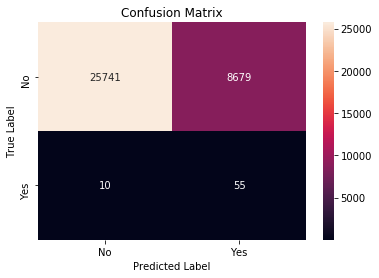

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#plt.savefig('Confusion Matrix.jpg', dpi=1200)
plt.show()

# The model only predicts 29 corrupt cases correctly 

## Feature Importance

In [87]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [88]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 145 (0.234300)
2. feature 14 (0.050397)
3. feature 146 (0.042441)
4. feature 13 (0.034283)
5. feature 147 (0.025916)
6. feature 20 (0.022958)
7. feature 38 (0.019466)
8. feature 39 (0.018032)
9. feature 47 (0.017805)
10. feature 45 (0.017095)
11. feature 138 (0.016909)
12. feature 2 (0.016543)
13. feature 139 (0.015415)
14. feature 143 (0.014936)
15. feature 1 (0.014501)
16. feature 37 (0.014473)
17. feature 17 (0.014372)
18. feature 48 (0.014301)
19. feature 144 (0.014110)
20. feature 135 (0.013954)
21. feature 0 (0.013911)
22. feature 137 (0.013779)
23. feature 142 (0.013493)
24. feature 133 (0.013394)
25. feature 134 (0.013264)
26. feature 140 (0.013174)
27. feature 132 (0.013127)
28. feature 57 (0.012680)
29. feature 136 (0.012441)
30. feature 104 (0.011976)
31. feature 141 (0.011414)
32. feature 28 (0.010867)
33. feature 130 (0.010129)
34. feature 72 (0.010109)
35. feature 79 (0.009688)
36. feature 92 (0.008887)
37. feature 8 (0.008224)
38. feature 107 

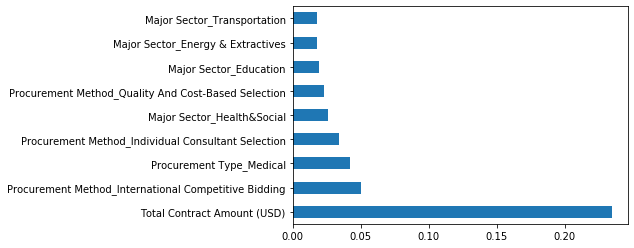

In [90]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(9)
   .plot(kind='barh'))

## Partial Dependence Plots 

In [91]:
from sklearn.inspection import plot_partial_dependence

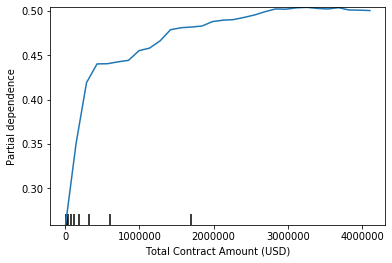

In [92]:
# Total Contract Amount
my_plots = plot_partial_dependence(model,       
                                   features=[145], 
                                   X=X,            
                                   grid_resolution=30) 

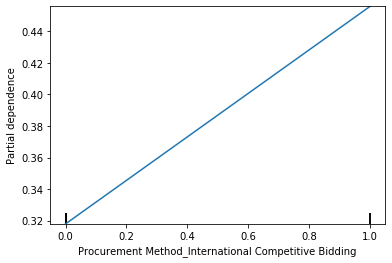

In [93]:
# International Competitive Bidding 
# They are dummy variables so it's just a straight line 
# But gives indication about the direction of the variable 

my_plots = plot_partial_dependence(model,       
                                   features=[14], 
                                   X=X,           
                                   grid_resolution=10) 

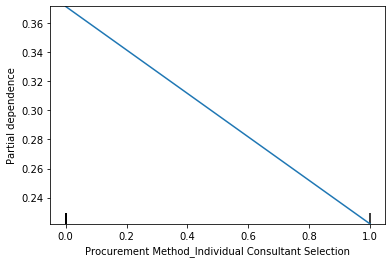

In [94]:
# Individual Consultant Selection
my_plots = plot_partial_dependence(model,       
                                   features=[13], 
                                   X=X,           
                                   grid_resolution=10)

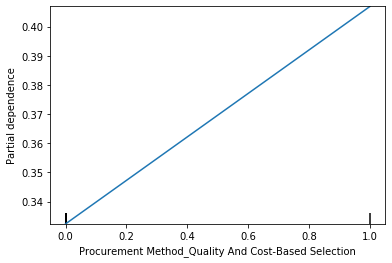

In [95]:
# Quality and cost based selection
my_plots = plot_partial_dependence(model,       
                                   features=[20],
                                   X=X,            
                                   grid_resolution=10) 

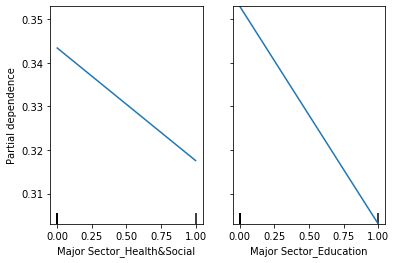

In [100]:
# Health & Social
# Education

my_plots = plot_partial_dependence(model,       
                                   features=[147, 38], 
                                   X=X,         
                                   grid_resolution=10) 

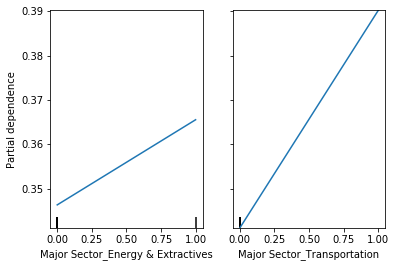

In [101]:
# Energy & Extractives
# Transportation

my_plots = plot_partial_dependence(model,       
                                   features=[39, 47], 
                                   X=X,           
                                   grid_resolution=10) 

## First attempt at Re-Sampling

In [ ]:
## This was my first re-sampling strategy which I ended up not using 
## With this re-sampling 

In [93]:
# Target variable is highly unbalanced: Ratio of 530 to 1
# I would like to move to a ratio of 100:1
# Moving to a 1:1 ratio is too far from reality 

In [75]:
# We rebalance the training set
# Here, we undersample a little bit the number of 0 observations from 137 679 to 136 966 
# We also oversample the number of 1 observations from 260 to 1385 (multiplication by 5)
# Used 900 for the OG model and +75 ##
# 200 and 250 gives balanced dataset

id_toTrain = np.array([np.where(Y_train==i)[0] for i in range(nb_class)])

size_max = [len(id_toTrain[i]) for i in range(nb_class)]
print("before resampling")
print(size_max)

blc = 900 ## change this
for i in range(len(size_max)):
    if size_max[i] > blc:
        size_max[i] = int(blc*(np.log10(size_max[i]/blc)+75)) # changing this only reduces the 0 observations
    else:
        size_max[i] = int(blc/(np.log10(blc/size_max[i]+1)))

print("after resampling")
print(size_max)
for i in range(nb_class):
    if len(id_toTrain[i]) > size_max[i]:
        id_toTrain[i], tmp = train_test_split(id_toTrain[i], test_size=1-size_max[i]/len(id_toTrain[i]))
    else:
        id_toTrain[i] = np.concatenate((id_toTrain[i], id_toTrain[i][np.random.randint(len(id_toTrain[i]), size=int(size_max[i]-len(id_toTrain[i])))]))
id_toTrain = np.concatenate(id_toTrain)
X_toTrain = X_train.iloc[id_toTrain]
Y_toTrain = Y_train.iloc[id_toTrain]

# The ratio was 530:1 and now it is 98:1
# Now it is 60 to 1

before resampling
[137679, 260]
after resampling
[69466, 1385]


In [76]:
# In order totrain my model I will now also rebalance the test set
# I change the blc to have less rows 
# In the end I will test my final model on un unbalanced test set
# 200 and +90

id_toTest = np.array([np.where(Y_test==i)[0] for i in range(nb_class)])

size_max = [len(id_toTest[i]) for i in range(nb_class)]
print("before resampling")
print(size_max)

blc = 200
for i in range(len(size_max)):
    if size_max[i] > blc:
        size_max[i] = int(blc*(np.log10(size_max[i]/blc)+80)) ## first is 150 for oversampling 
    else:
        size_max[i] = int(blc/(np.log10(blc/size_max[i]+1)))

print("after resampling")
print(size_max)
for i in range(nb_class):
    if len(id_toTest[i]) > size_max[i]:
        id_toTest[i], tmp = train_test_split(id_toTest[i], test_size=1-size_max[i]/len(id_toTest[i]))
    else:
        id_toTest[i] = np.concatenate((id_toTest[i], id_toTest[i][np.random.randint(len(id_toTest[i]), size=int(size_max[i]-len(id_toTest[i])))]))
id_toTest = np.concatenate(id_toTest)
X_toTest = X_test.iloc[id_toTest]
Y_toTest = Y_test.iloc[id_toTest]

# The ratio for the test set is 93:1
# Now is around 60 to 1

before resampling
[34420, 65]
after resampling
[16447, 327]


## Feature Selection

In [ ]:
## I end up also not using feature selection because my final model does it for me

In [77]:
from sklearn.feature_selection import SelectKBest, chi2

In [78]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [79]:
## This runs for all 147 columns 
## Clearly, the numerical variable: total contract amount is the most important 

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3.681497
Feature 1: 19.016617
Feature 2: 20.044326
Feature 3: 0.090621
Feature 4: 0.001888
Feature 5: nan
Feature 6: 0.013219
Feature 7: 1.646880
Feature 8: 9.417565
Feature 9: 0.007554
Feature 10: 0.184247
Feature 11: 0.028327
Feature 12: 0.001888
Feature 13: 43.375823
Feature 14: 129.805201
Feature 15: 0.152549
Feature 16: 1.406896
Feature 17: 4.765024
Feature 18: 0.003777
Feature 19: 0.001888
Feature 20: 23.011083
Feature 21: 0.155413
Feature 22: 7.161005
Feature 23: 0.033992
Feature 24: 0.704392
Feature 25: 0.177206
Feature 26: 0.570312
Feature 27: 0.226043
Feature 28: 19.742404
Feature 29: 0.219060
Feature 30: 0.003777
Feature 31: 0.013219
Feature 32: 0.016996
Feature 33: 0.001888
Feature 34: 0.043434
Feature 35: nan
Feature 36: 0.005665
Feature 37: 8.357397
Feature 38: 17.761013
Feature 39: 7.272398
Feature 40: 0.515665
Feature 41: 0.354958
Feature 42: 4.249014
Feature 43: 5.310323
Feature 44: 0.050988
Feature 45: 5.588683
Feature 46: 1.422003
Feature 47: 10.041932
Fea

In [ ]:
from matplotlib import pyplot
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [62]:
# Create and fit selector
selector = SelectKBest(score_func=chi2, k=20)
selector.fit(X_train, Y_train)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_train_k = X_train.iloc[:,cols]

In [63]:
X_train_k.head(5)

,Procurement Category_CONSULTANT SERVICES,Procurement Category_GOODS,Procurement Method_Direct Selection,Procurement Method_Individual Consultant Selection,Procurement Method_International Competitive Bidding,Procurement Method_Quality And Cost-Based Selection,Procurement Method_Single Source Selection,Major Sector_(H)Health & social,Major Sector_Education,Major Sector_Health,Major Sector_Transportation,Product line_Recipient Executed Activities,"Procurement Type_Equipment, Medical",Procurement Type_Feasibility Studies,Procurement Type_Not assigned,"Procurement Type_Pharmaceuticals, Medical Products",Procurement Type_Unidentified Works Type,July
148405,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
126069,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4038,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
85621,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57471,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
X_train_k.columns

Index(['Procurement Category_CONSULTANT SERVICES',
       'Procurement Category_GOODS', 'Procurement Method_Direct Selection',
       'Procurement Method_Individual Consultant Selection',
       'Procurement Method_International Competitive Bidding',
       'Procurement Method_Quality And Cost-Based Selection',
       'Procurement Method_Single Source Selection',
       'Major Sector_(H)Health & social', 'Major Sector_Education',
       'Major Sector_Health', 'Major Sector_Transportation',
       'Product line_Recipient Executed Activities',
       'Procurement Type_Equipment, Medical',
       'Procurement Type_Feasibility Studies', 'Procurement Type_Not assigned',
       'Procurement Type_Pharmaceuticals, Medical Products',
       'Procurement Type_Unidentified Works Type', 'July'],
      dtype='object')

## Correlation Analysis

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
## Let me do a correlation on rebalanced training set 
CORR_resampled = X_train.join(Y_train)

In [93]:
corrmat = CORR_resampled.corr()

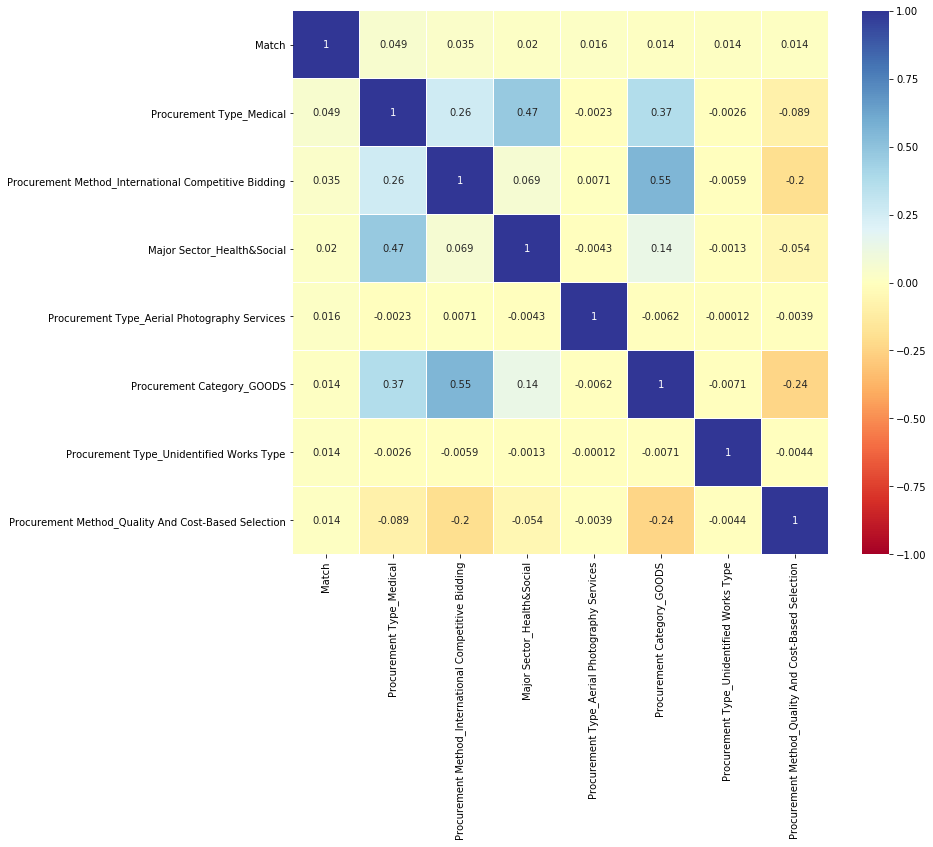

In [94]:
# getting the variables that are highly correlated to match
# k : number of variables for heatmap 
k = 8
  
cols = corrmat.nlargest(k, 'Match')['Match'].index 
  
cm = np.corrcoef(CORR_resampled[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'RdYlBu',
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 